<a href="https://colab.research.google.com/github/WatchTheory/Alumni-Analysis/blob/main/EDA_Alumni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pickle

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge  , LogisticRegression   # Ridge Regression  # linear Regression Model
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingRegressor    # Boosting Regressor
from sklearn.ensemble import RandomForestRegressor            # Random Forest
from bokeh.plotting import figure, show
from sklearn.metrics import ConfusionMatrixDisplay      # ConfusionMatrix Display



from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

In [ ]:
# allows me to view the whole list of columns
# Set option to display all rows (if your output from isna().sum() is very long)
pd.set_option('display.max_rows', None)

# Setting df head to all show all columns
pd.set_option('display.max_columns', None)

## Load The Data

In [ ]:
alu = pd.read_csv('alumni.csv')

In [ ]:
alu.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [ ]:
alu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


## Visualization Before Cleaning

We can see there a couple of outliers in the dataset, mostly at the end of the dataset.

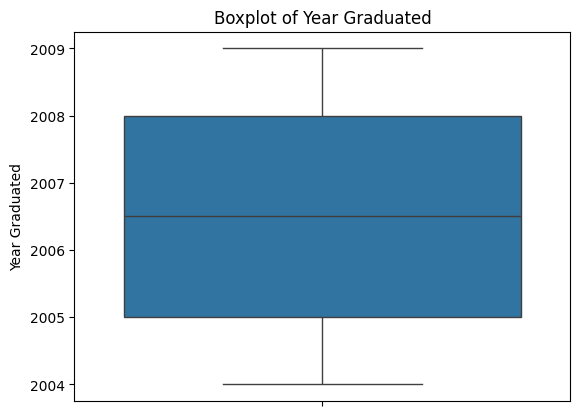

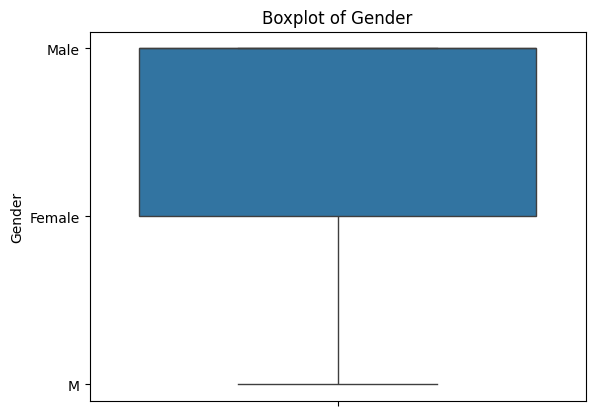

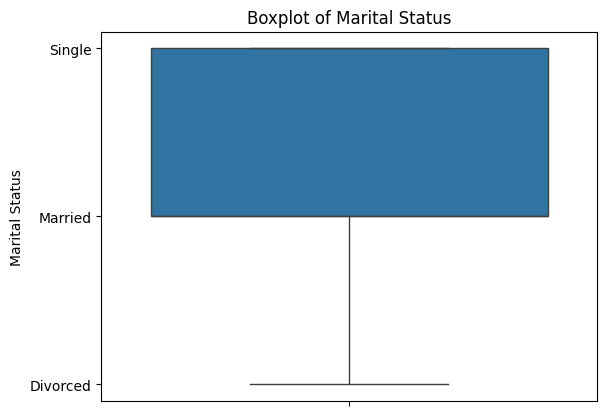

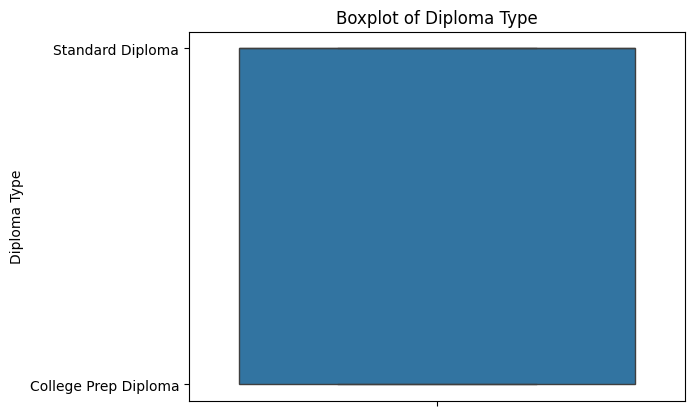

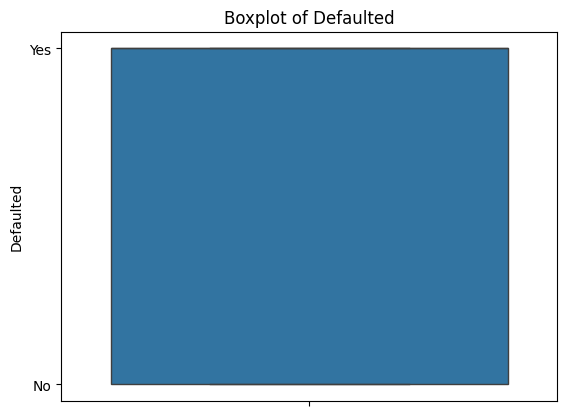

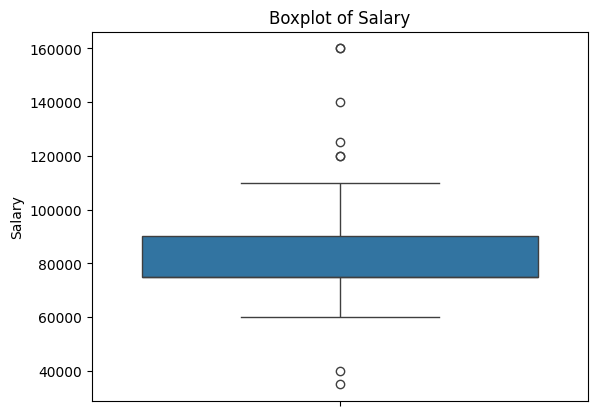

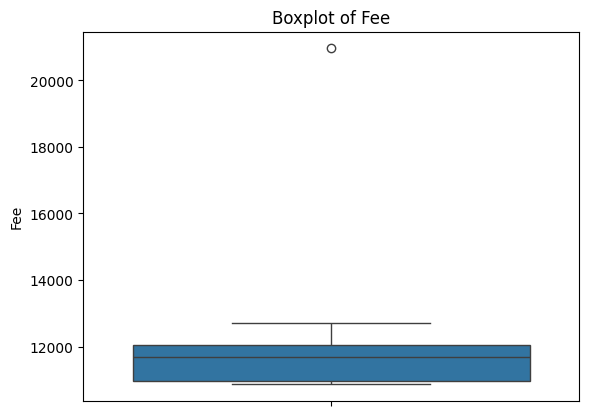

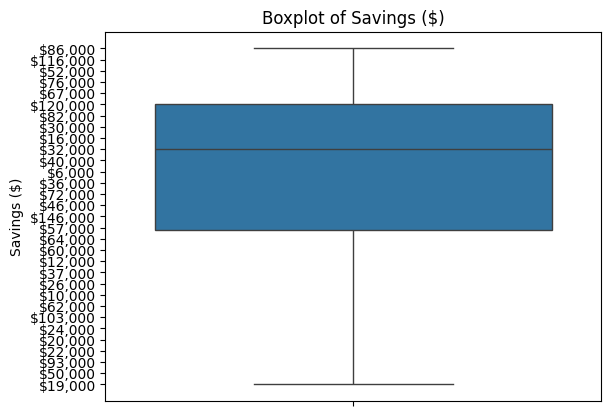

In [ ]:
# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in alu:
  sns.boxplot(alu[i])
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [ ]:
fig = px.bar(alu,
            x='Diploma Type',
            y='Savings ($)')
fig.show()

<Axes: xlabel='Diploma Type', ylabel='Savings ($)'>

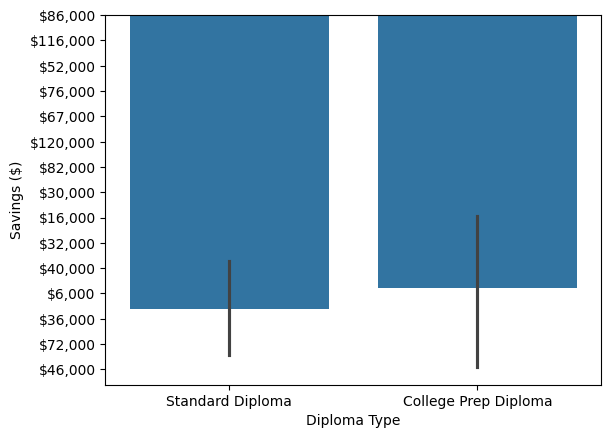

In [ ]:
sns.barplot(data=alu,
            x='Diploma Type',
            y='Savings ($)')

This bar charts shows the Fee and saving the graduates have achived

In [ ]:
fig = px.bar(alu,
            x ='Fee',
            y ='Savings ($)')
fig.show()

## Data Cleaning

We will remove the outliers

In [ ]:
# Put all numerica columns into a list with only int65 and floats columns
numeric_columns = alu.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
# Put all the categorical columns into a list with ONLY Object colymns
category_columns = alu.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Detect Outliers
Q1 = alu[numeric_columns].quantile(0.25)
Q3 = alu[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame where True means the value is NOT an outlier within its column
is_not_outlier = (alu[numeric_columns] >= lower_bound) & (alu[numeric_columns] <= upper_bound)

In [ ]:
# Remove rows with any outliers in numeric_columns
alum_no_outliers = alu[is_not_outlier.all(axis=1)]

# Checking the shape before and after to see how many rows were removed
print("Original shape:", alu.shape)
print("Shape after removing outliers:", alum_no_outliers.shape)

Original shape: (88, 8)
Shape after removing outliers: (80, 8)


We removed only 8 rows, now we will run the for loop with the outliers to see what is removed    -- We remove a bunch of outliers

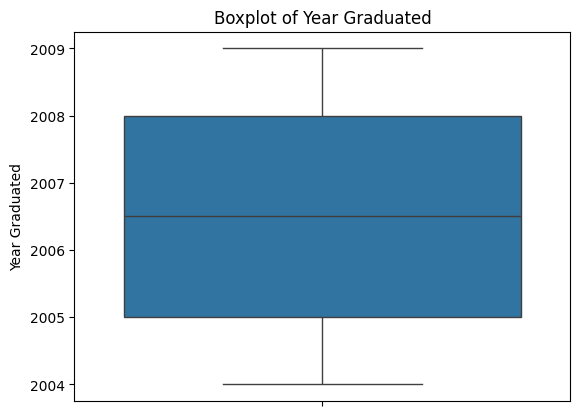

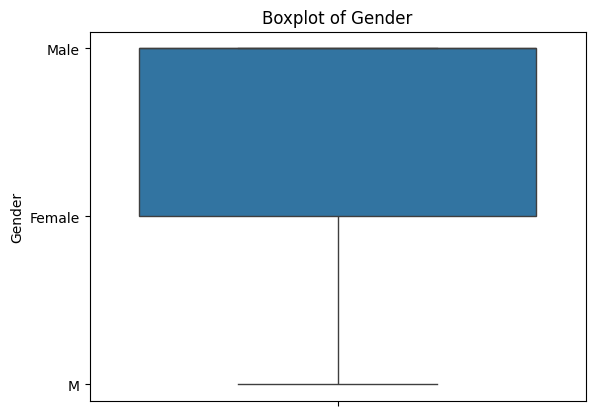

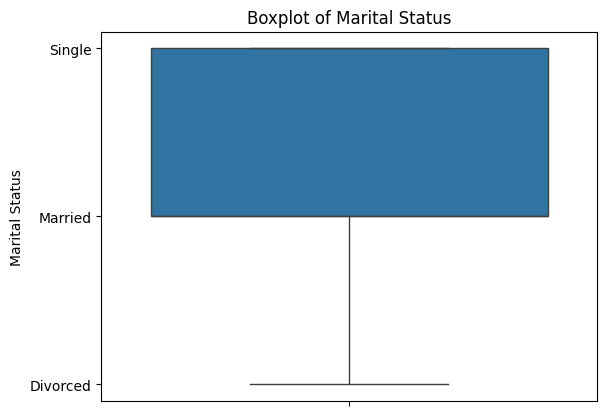

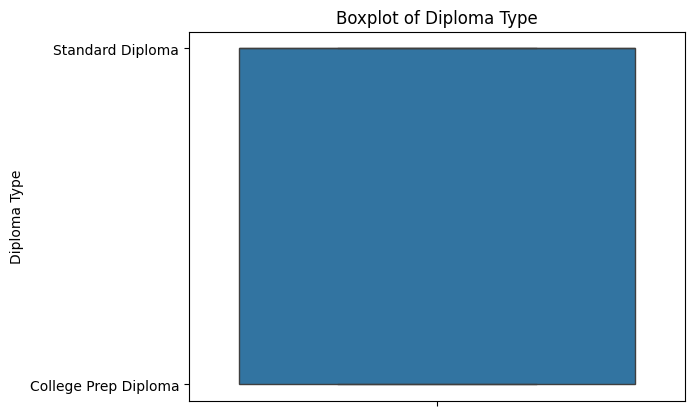

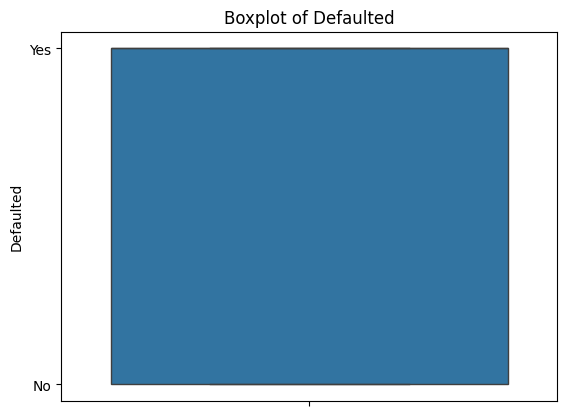

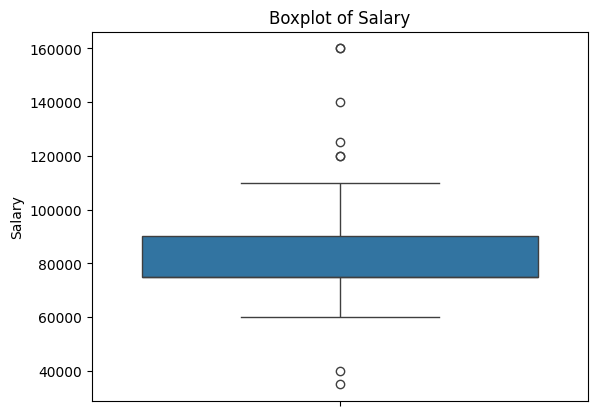

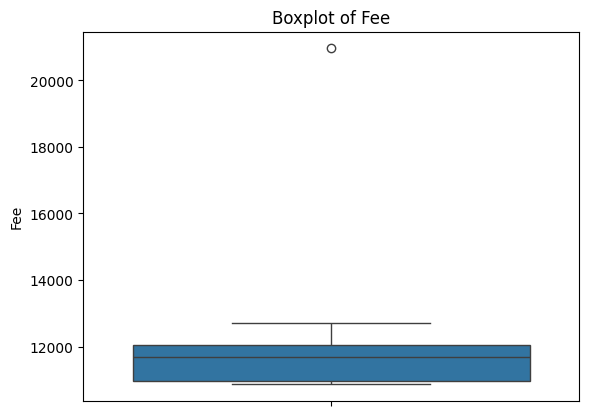

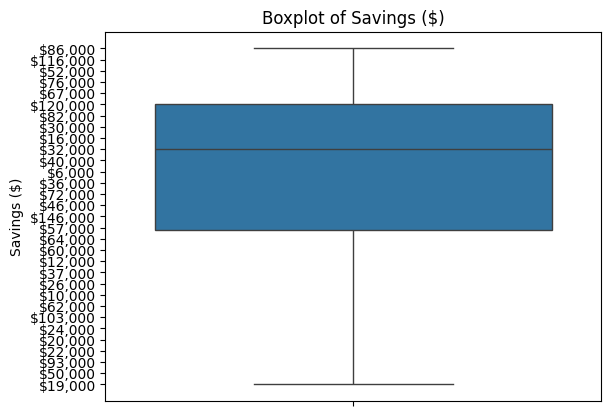

In [ ]:
# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in alu:
  sns.boxplot(alu[i])
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [ ]:
# Rename the last column 'Savings ($)' column, to get rid of the special characters
# We will also rename a column
alu.rename(columns={'Savings ($)': 'Savings'}, inplace=True)

In [ ]:
# It worked! Look much cleaner
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


Map the `M` found in the dataset to Male

In [ ]:
alu['Gender'] = alu['Gender'].replace('M', 'Male')
alu['Gender'].value_counts()

,count
Gender,
Male,49
Female,39


In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


### Final Check

In [ ]:
alu.isna().sum()

,0
Year Graduated,0
Gender,0
Marital Status,0
Diploma Type,0
Defaulted,0
Salary,0
Fee,0
Savings,0


## Visualization After Cleaning

It looks we clearned out most of the outliers that were in the dataset.

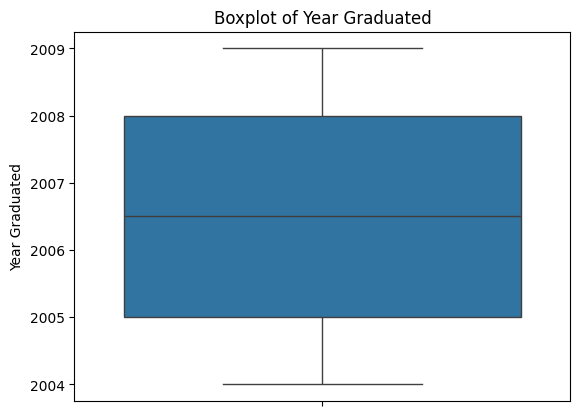

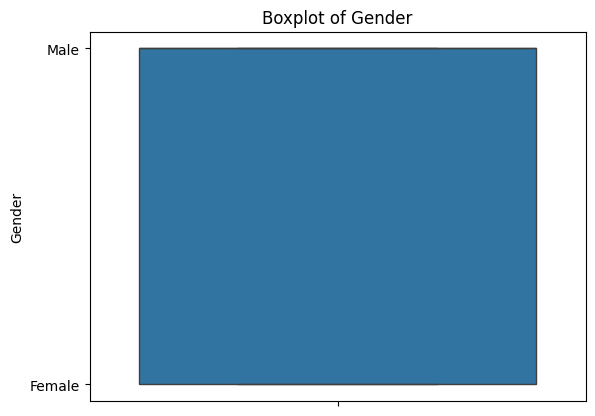

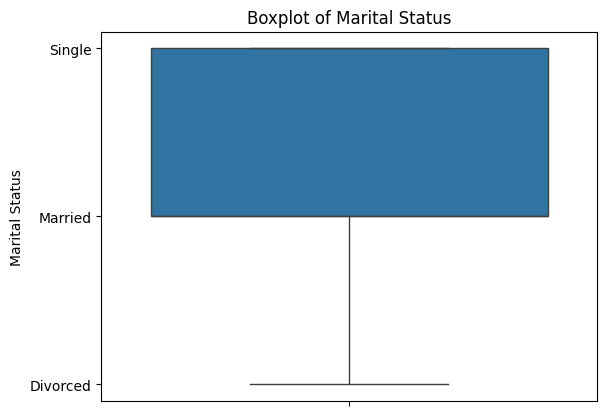

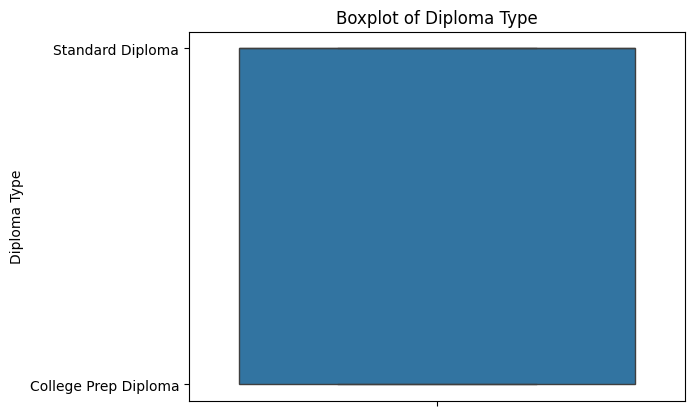

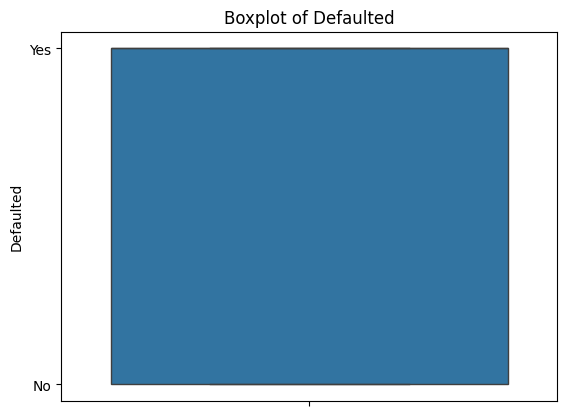

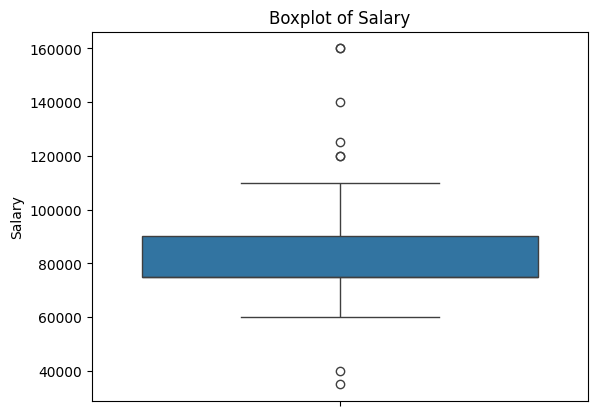

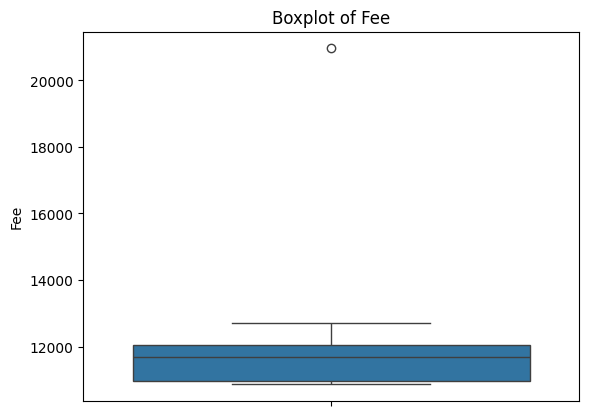

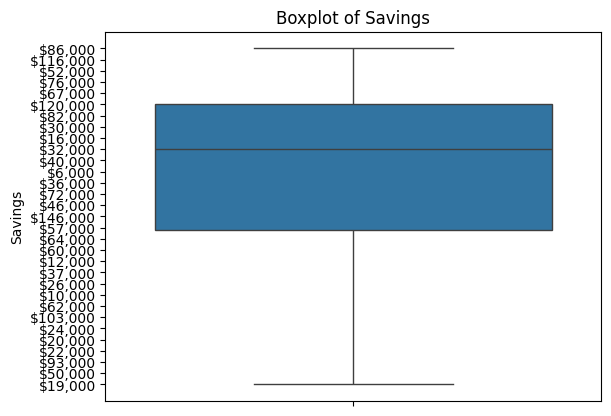

In [ ]:
# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in alu:
  sns.boxplot(alu[i])
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

This a bar graph shows the dataset  AFTER cleaning, there is not much that has changes

In [ ]:
fig = px.bar(alu,
            x='Diploma Type',
            y='Savings')

fig.show()

## EDA

In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


Of the `College Prep Diploma`, we can see `Males` earn an a College Diploma, less than females. The funnel connecting Standard Diploma to College Diploma for `Females` is very narrow than the Males, suggesting that more `Males` will purse `College Diploma`.

<Axes: xlabel='Gender', ylabel='Diploma Type'>

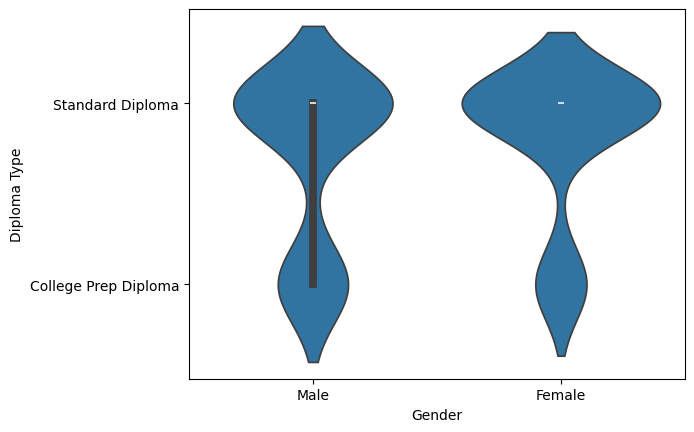

In [ ]:
sns.violinplot(data=alu,
                x='Gender',
                y='Diploma Type')

In [ ]:
fig = px.histogram(alu,
             x='Gender',
             color='Diploma Type',
             title='Distribution of Diploma Types by Gender')
fig.show()

From this histogram, the data suggest that males have a bigger `Maritual Status` with `Males`being double the size of female and single count. However, `Females` have a higher `divorced` count.

In [ ]:
fig = px.histogram(alu,
             x='Gender',
             color='Marital Status',
             title='Distribution of Diploma Types by Marital Status')
fig.show()

<Axes: xlabel='Gender', ylabel='Diploma Type'>

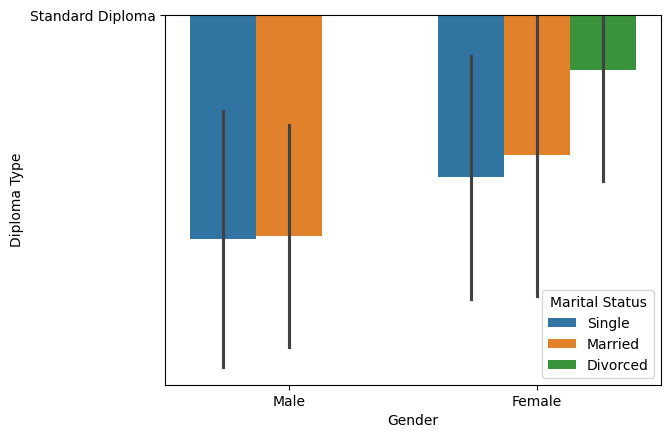

In [ ]:
sns.barplot(data=alu,
                x='Gender',
                y='Diploma Type',
                hue='Marital Status')

In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


This is a bar chart that shows the number of Graduates per year. As you can see, it hit the highest graduates in `2007` then gradualy declines from there.

Based off the data, both `Male` and `Female` have at least one drop in graduates, for `Males` its in `2007` and for `Females` it in `2009`

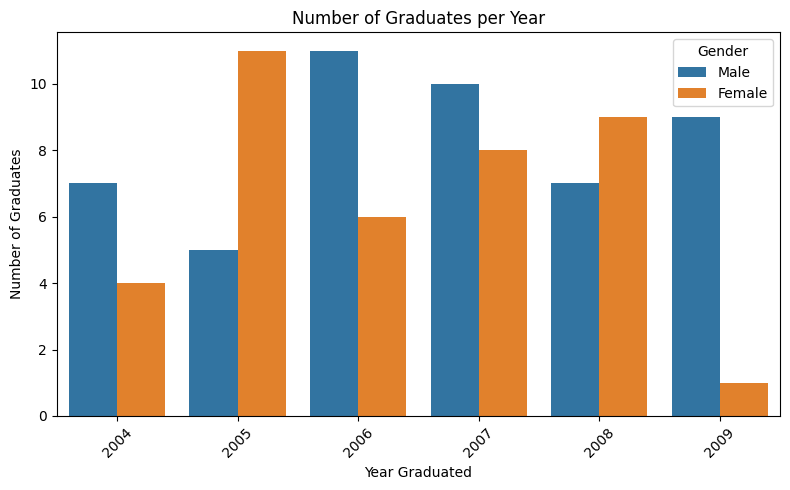

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=alu, x='Year Graduated',hue='Gender')
plt.title("Number of Graduates per Year")
plt.xlabel("Year Graduated")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is a lineplot, this explains some of what was happening during time the graduates were in school. As you can see, after getting there diploma, some got `divorced` but most of them end up getting `married`, while others remained `singled`.

<Axes: xlabel='Year Graduated', ylabel='Diploma Type'>

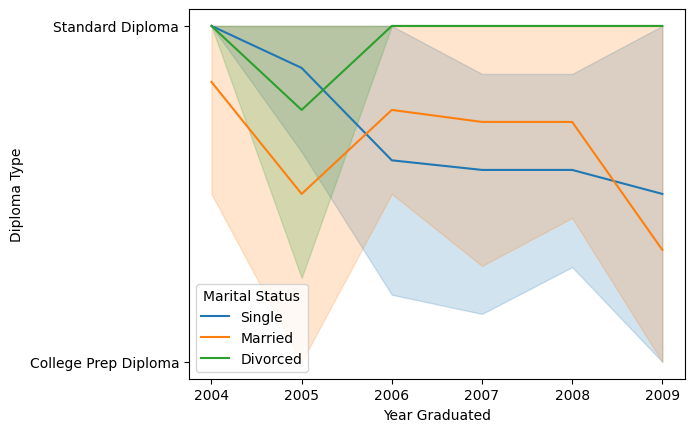

In [ ]:
sns.lineplot(data=alu,
                x='Year Graduated',
                y='Diploma Type',
                hue='Marital Status')

## Model

In [ ]:
alu.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


<Axes: >

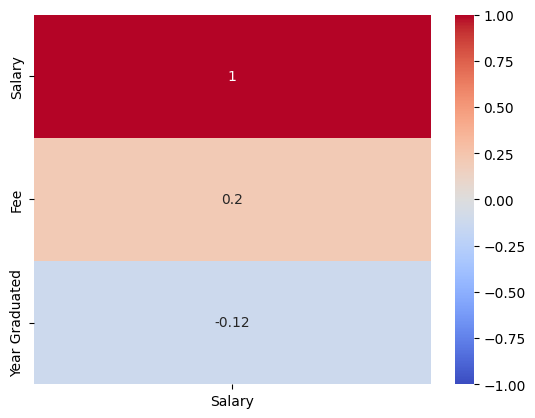

In [ ]:
# using a heat map to determine which columns is more useable to run for 'predicting'
sns.heatmap(alu.corr(numeric_only = True)['Salary'].sort_values(ascending = False).to_frame(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')

In [ ]:
# Declaring X and Y

X= alu[['Fee','Year Graduated']]
y= alu['Salary']

In [ ]:
# Using X and Y split to train and test our data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42 )

In [ ]:
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# regression_models = {
#     'LinearRegression': LinearRegression(),
#     'RandomForestRegressor': RandomForestRegressor(),
# }

# classification_models = {
#     'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
#     'LogisticRegression': LogisticRegression(),
#     'RandomForestClassifier': RandomForestClassifier(),
# }


# print("Regression models (R² scores):")
# for name, model in regression_models.items():
#     model.fit(X_train_scaled, y_train)
#     train_r2 = model.score(X_train_scaled, y_train)
#     test_r2  = model.score(X_test_scaled, y_test)
#     print(f"{name} - Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

# print("\nClassification models (Accuracy):")
# for name, model in classification_models.items():
#     model.fit(X_train_scaled, y_train)
#     train_acc = model.score(X_train_scaled, y_train)
#     test_acc  = model.score(X_test_scaled, y_test)
#     print(f"{name} - Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")


In [ ]:
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

In [ ]:
# ---- Track best regression model ----
best_reg_pipe = None
best_reg_name = None
best_reg_score = -np.inf

print("Regression models (R² scores):")
for name, model in regression_models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)  # Name the estimator step as you like
    ])
    pipe.fit(X_train, y_train)
    train_r2 = pipe.score(X_train, y_train)
    test_r2 = pipe.score(X_test, y_test)
    print(f"{name} - Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

    if test_r2 > best_reg_score:
        best_reg_score = test_r2
        best_reg_pipe = pipe  # Track the pipeline
        best_reg_name = name

In [ ]:
# ---- Track best classification model ----
best_clf_pipe = None
best_clf_name = None
best_clf_score = -np.inf

print("\nClassification models (Accuracy):")
for name, model in classification_models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)  # Name the estimator step as you like
    ])
    pipe.fit(X_train, y_train)
    train_acc = pipe.score(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)
    print(f"{name} - Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")

    if test_acc > best_clf_score:
        best_clf_score = test_acc
        best_clf_pipe = pipe  # Track the pipeline
        best_clf_name = name

In [ ]:
if best_reg_pipe is not None:
    with open('best_regression_pipeline.pkl', 'wb') as f:
        pickle.dump(best_reg_pipe, f)
    print(f"Saved best regression pipeline: {best_reg_name}")

if best_clf_pipe is not None:
    with open('best_classification_pipeline.pkl', 'wb') as f:
        pickle.dump(best_clf_pipe, f)
    print(f"Saved best classification pipeline: {best_clf_name}")

In [ ]:
# regression_models = {
#     'LinearRegression': LinearRegression(),
#     'RandomForestRegressor': RandomForestRegressor(),
# }

# classification_models = {
#     'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
#     'LogisticRegression': LogisticRegression(),
#     'RandomForestClassifier': RandomForestClassifier(),
# }

# # ---- Track best regression model ---- #
# best_reg_model = None
# best_reg_name = None
# best_reg_score = -np.inf

# print("Regression models (R² scores):")
# for name, model in regression_models.items():
#     model.fit(X_train_scaled, y_train)
#     train_r2 = model.score(X_train_scaled, y_train)
#     test_r2  = model.score(X_test_scaled, y_test)
#     print(f"{name} - Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

#     if test_r2 > best_reg_score:
#         best_reg_score = test_r2
#         best_reg_model = model
#         best_reg_name = name

# # ---- Track best classification model ----
# best_clf_model = None
# best_clf_name = None
# best_clf_score = -np.inf

# print("\nClassification models (Accuracy):")
# for name, model in classification_models.items():
#     model.fit(X_train_scaled, y_train)
#     train_acc = model.score(X_train_scaled, y_train)
#     test_acc  = model.score(X_test_scaled, y_test)
#     print(f"{name} - Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")

#     if test_acc > best_clf_score:
#         best_clf_score = test_acc
#         best_clf_model = model
#         best_clf_name = name


Regression models (R² scores):
LinearRegression - Train R²: 0.013, Test R²: -0.225
RandomForestRegressor - Train R²: 0.718, Test R²: 0.067

Classification models (Accuracy):
KNeighborsClassifier - Train Acc: 0.682, Test Acc: 0.409
LogisticRegression - Train Acc: 0.348, Test Acc: 0.318
RandomForestClassifier - Train Acc: 0.970, Test Acc: 0.273


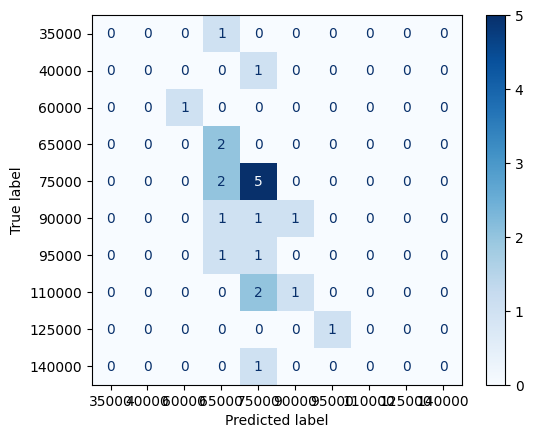

In [ ]:
ConfusionMatrixDisplay.from_estimator(classification_models, X_test_scaled, y_test, cmap = 'Blues')

### Pickle

In [ ]:
with open('best_regression_pipeline.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)
predictions = loaded_pipe.predict(new_data)  # Automatically scales new_data

In [ ]:
# For a regression project:
# model_to_save = best_reg_model
# model_name = best_reg_name
# model_type = "regression"
# test_score = best_reg_score

# OR for a classification project:
# model_to_save = best_clf_model
# model_name = best_clf_name
# model_type = "classification"
# test_score = best_clf_score

# saved_object = {
#     "scaler": sc,
#     "model": model_to_save,
#     "model_name": model_name,
#     "model_type": model_type,
#     "test_score": test_score,
# }

# with open("EDA_alumni.pkl", "wb") as f:
#     pickle.dump(saved_object, f)


In [ ]:
# Change the destination
# EDA_alumni_pkl_file = '/content/drive/MyDrive/Colab Notebooks/Coding_Labs/Alumni Dataset Project/'

# Whatever you call it, you will use it on your docker file
# eda_pickel = 'Eda_alumni_pkl_file'

# opening your model
# change out 'lr' for whatever you call your model
# with open('Eda_alumni_pkl_file', 'wb') as file:
#     model = pickle.dump(, file)

# loading your model into google colab
# x1 = pickle.load('pkl_file')

# Use to open the Pickel file
# Change 'model' for whatever you call your model
# with open(model, 'rb') as file:
#     model = pickle.load(file)